# Diffusivity Equation

## 2D Diffusion

The 2D-diffusion equation:

$$\frac{\partial p}{\partial t} = \lambda \frac{\partial ^2 p}{\partial x^2} + \lambda \frac{\partial ^2 p}{\partial y^2}$$



$$\frac{p_{i,j}^{n+1} - p_{i,j}^n}{\Delta t} = \lambda \frac{p_{i+1,j}^n - 2 p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \lambda \frac{p_{i,j+1}^n-2 p_{i,j}^n + p_{i,j-1}^n}{\Delta y^2}$$

Represent pressure p as general form, u:
$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^n &+ \frac{\lambda \Delta t}{\Delta x^2}(u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n) \\
&+ \frac{\lambda \Delta t}{\Delta y^2}(u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

Where $\lambda =  \frac{\phi \mu c_t}{k} \ $

## Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Variable Declarations

For numerical stability, we are going to limit the size of $\Delta t$ using $\sigma $

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}$$

In [26]:
num_x = 30
num_y = 30
num_t = 20
lmbda = 1

dx = 0.1
dy = 0.1

# For stablization
sigma = 0.25

dt = (sigma * dx * dy) / lmbda

lower_bound = 0
upper_bound = 2

x = np.linspace(lower_bound, upper_bound, num_x)
y = np.linspace(lower_bound, upper_bound, num_y)

u = np.ones((num_y, num_x))

## Initial Conditions

Set Initial Condition
$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

### At t = 0

## Boundary Conditions

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$


Requires an Initial Condition and Two Boundary Conditions

Assuming homogeneous, isotropic formation and 100% saturated pore space

In [27]:
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

### At x = -1 

### At x = 1

### At y = 0

### At y = 1

## Plot I.C and B.C

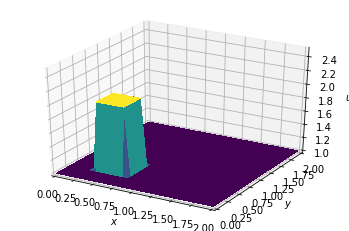

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
ax.set_zlabel('$u$');

## Diffusivity through n timesteps

In [29]:
def set_initial_conditions(u):
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    return u

In [30]:
def diffusivity(num_t):
    for n in range(num_t + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = un[1:-1,1:-1] + (lmbda * dt / dx**2) * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + (lmbda * dt / dy**2) * (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])
        set_initial_conditions(u)
    return u

In [31]:
def plot(X,Y,u):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased = True)
    
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
    ax.set_zlabel('$u$');

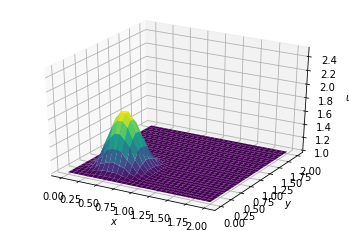

In [32]:
plot(X,Y, diffusivity(5))

In [22]:
plot(X, y, diffusivity(10))

TypeError: plot() missing 1 required positional argument: 'Y'

In [ ]:
plot(X, y, diffusivity(20))